# Regression Spline

## Load Data

In [1]:
import numpy as np
from sklearn.datasets import make_regression

In [2]:
np.random.seed(0)
X = np.linspace(0, 6.28, 500)
y = np.sin(X) + np.random.normal(0, 0.3, 500)

In [3]:
import matplotlib.pyplot as plt

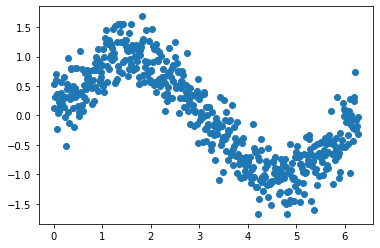

In [4]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## My Regression Spline

In [7]:
class MyRegressionSpline:
  def fit(self, X_train, y_train, m, k):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    self.m = m
    self.k = np.array(k)
    X_train_new = np.power(X_train, 0)
    for i in range(1, m+1):
      X_train_new = np.column_stack((X_train_new, np.power(X_train, i)))
    for i in range(len(k)):
      X_train_new = np.column_stack((X_train_new, np.where(np.power(X_train-k[i], m) < 0, 0, np.power(X_train-k[i], m))))
    self.beta = np.linalg.inv(np.transpose(X_train_new).dot(X_train_new)).dot(np.transpose(X_train_new)).dot(y_train)
  def predict(self, X_test):
    X_test = np.array(X_test)
    X_test_new = np.power(X_test, 0)
    for i in range(1, self.m+1):
      X_test_new = np.column_stack((X_test_new, np.power(X_test, i)))
    for i in range(len(self.k)):
      X_test_new = np.column_stack((X_test_new, np.where(np.power(X_test-self.k[i], self.m) < 0, 0, np.power(X_test-self.k[i], self.m))))
    return X_test_new.dot(self.beta)

In [8]:
model = MyRegressionSpline()

In [9]:
model.fit(X_train, y_train, 3, [1.57, 4.71])

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error as mse

In [12]:
print('MSE of My RegressionSpline:', mse(y_test, y_pred))

MSE of My RegressionSpline: 0.08787998647675975


## Compare to Scikit-Learn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [14]:
model = LinearRegression()

In [15]:
X_train = X_train.reshape(-1, 1)

In [16]:
model.fit(PolynomialFeatures(degree=3).fit_transform(X_train), y_train)

LinearRegression()

In [17]:
X_test = X_test.reshape(-1, 1)

In [18]:
y_pred = model.predict(PolynomialFeatures(degree=3).fit_transform(X_test))

In [19]:
print('MSE of sklearn PolynomialRegression:', mse(y_test, y_pred))

MSE of sklearn LinearRegression: 0.09351533435473519
